## Step 1 import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



## Step 2 :Load dataset

In [38]:
df=pd.read_csv(r"Mall_Customers.csv")

In [39]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 3 : Data preprocessing


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
# check missing value
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
# drop the column which is not required for analysis

df.drop(columns=["CustomerID","Gender"],inplace=True,axis=1)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## Step 4 : EDA

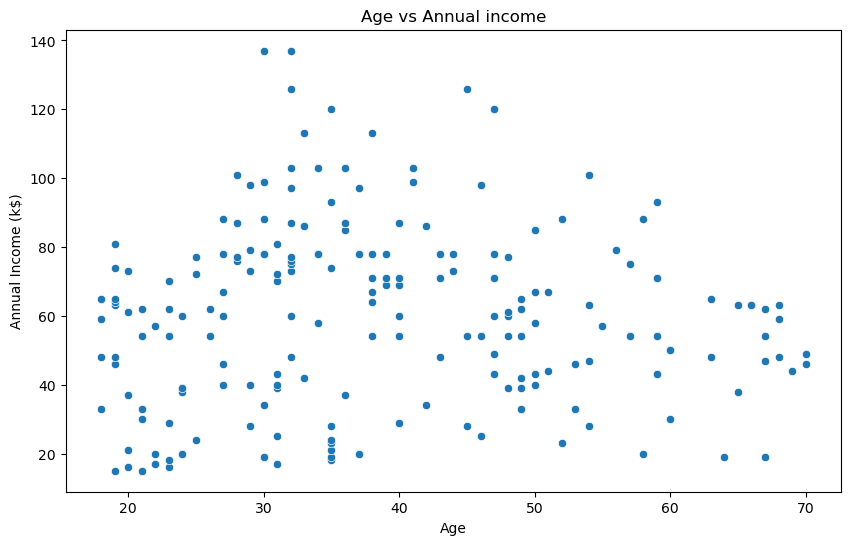

In [43]:
# Display age and annual income scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df)
plt.title("Age vs Annual income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

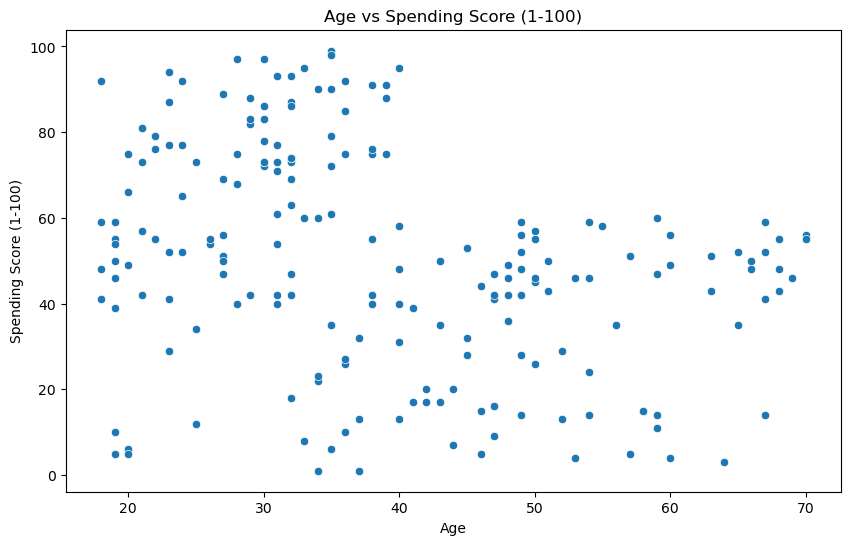

In [44]:
# Display age and Spending score scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.title("Age vs Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

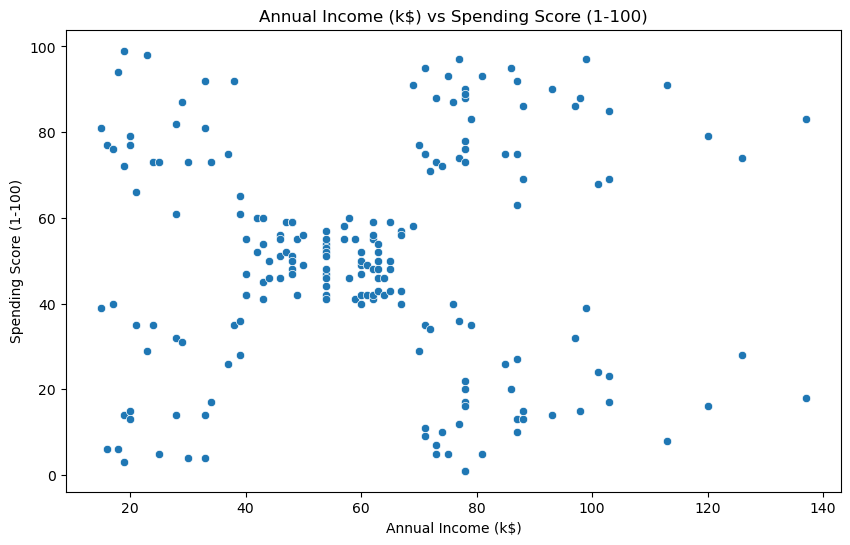

In [45]:
# Display Annual Income (k$) and annual income scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

## Step 5 : Feature engineering

In [46]:
# diaplay skewness name normal right skewness left skewed
def skewness_name(skewness):
    if skewness > 0:
        return "Right Skewed"
    elif skewness < 0:
        return "Left Skewed"
    else:
        return "Normal"
print("Skewness of Age:", skewness_name(df["Age"].skew()))
print("Skewness of Annual Income:", skewness_name(df["Annual Income (k$)"].skew()))
print("Skewness of Spending Score:", skewness_name(df["Spending Score (1-100)"].skew()))

Skewness of Age: Right Skewed
Skewness of Annual Income: Right Skewed
Skewness of Spending Score: Left Skewed


In [47]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

data=scaler.fit_transform(df)
df=pd.DataFrame(data,columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [48]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


## Step 6 : Train K-Mean model

In [49]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(df)
df['Cluster']=kmeans.labels_
df.head()

c:\Users\91934\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\Users\91934\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\91934\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\91934\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\91934\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

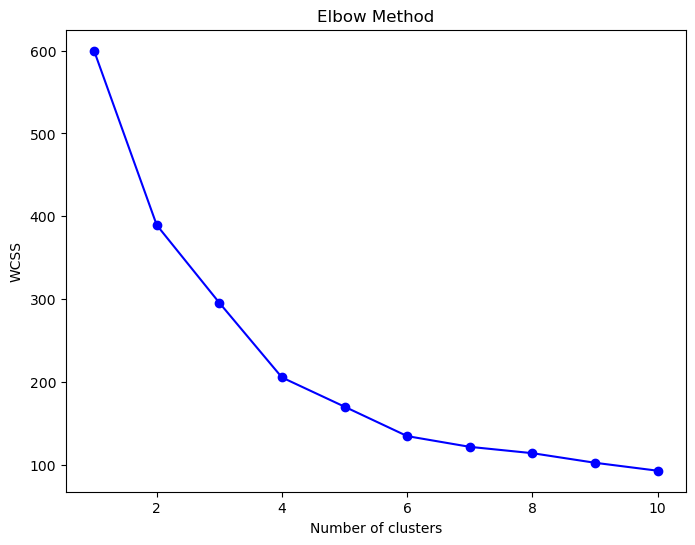

In [50]:
# check with ELBow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop("Cluster",axis=1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker="o",color="blue")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

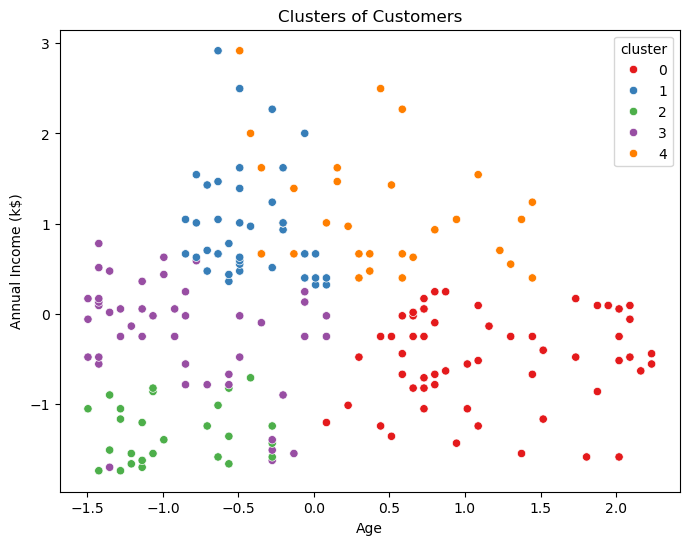

In [51]:
# display clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Annual Income (k$)", hue="Cluster", data=df, palette="Set1")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(title="cluster")
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

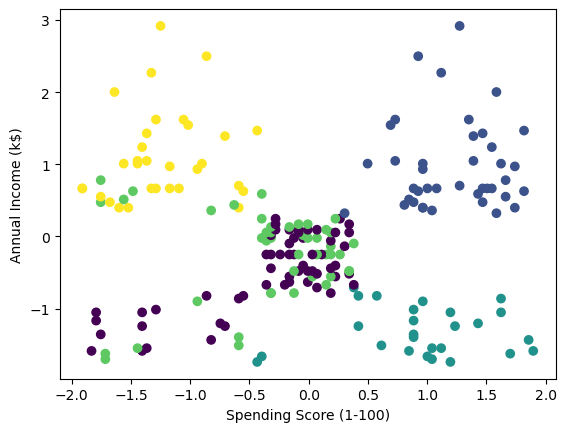

In [52]:
# display clusters
plt.scatter(df["Spending Score (1-100)"],
df["Annual Income (k$)"],
c = df["Cluster"]
)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

In [53]:
df.to_csv("Mall_customer_cluster.csv",index=False)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
data=pd.read_csv("Mall_customer_cluster.csv")
data=pd.DataFrame(data)
x=data.drop(columns=["Cluster"],axis=1)
y=data["Cluster"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred))

Accuracy score :  1.0
confusion_matrix : 
 [[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 10]]


In [55]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)
print("Accuracy score : ",accuracy_score(y_test,y_pred1))
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred1))

Accuracy score :  0.975
confusion_matrix : 
 [[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0 11  0]
 [ 0  0  0  0 10]]


In [56]:
import pickle
# Save the KNN model
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

print("KNN model saved as 'knn_model.pkl'")

KNN model saved as 'knn_model.pkl'
